# Exploration
This notebook is for tuning hyperparameters and finding the most accurate architecture for this aplication.

In [1]:
from utils import *
from torch.optim import RMSprop, Adam, SGD
from torch.optim.lr_scheduler import OneCycleLR, LinearLR, StepLR

In [2]:
import warnings
warnings.filterwarnings('always')

## Getting all the sequential data

In [3]:
sequential_length = 50

In [4]:
data_list = get_individual()
dataset = MegaDataset(data_list, sequential_length)


In [5]:
device = get_default_device()

In [6]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

#Cross-validation set:20% training set: 80%
val_size = round(0.2*len(dataset))

train_ds, val_ds = random_split(dataset , [len(dataset) - val_size, val_size])

batch_size = 32  # Change based in dataset size and  GPU capacity (also known as a hyperparameter)

train_loader = DataLoader(train_ds, batch_size, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

# Deep LSTM

In [7]:
hidden_size = 100
input_size = 2
num_layers = 5


In [8]:
model = ResLSTM(input_size, hidden_size,num_layers, dropout = 0.)
model = to_device(model, device)

In [13]:
history = []

In [23]:
##hyperparameters
epochs = 25
max_lr =5e-5
weigth_decay = 0
grad_clip = 0
opt_func = Adam
#opt_func = RMSprop
#opt_func = SGD
#lr_sched = OneCycleLR
#lr_sched = StepLR
lr_sched = None

In [24]:
history += model.fit(epochs, max_lr, train_loader, val_loader, weight_decay=weigth_decay, grad_clip=grad_clip, opt_func=opt_func, lr_sched=lr_sched)

Epoch [0]
	train_loss: 0.0483
	val_loss: 0.2036
	val_acc: 0.9517
	f1_score: 0.8694
	recall: 0.8656
	precision: 0.8742
Epoch [1]
	train_loss: 0.0481
	val_loss: 0.2048
	val_acc: 0.9517
	f1_score: 0.8695
	recall: 0.8654
	precision: 0.8745
Epoch [2]
	train_loss: 0.0479
	val_loss: 0.2061
	val_acc: 0.9517
	f1_score: 0.8695
	recall: 0.8652
	precision: 0.8748
Epoch [3]
	train_loss: 0.0477
	val_loss: 0.2073
	val_acc: 0.9517
	f1_score: 0.8696
	recall: 0.8651
	precision: 0.8750
Epoch [4]
	train_loss: 0.0475
	val_loss: 0.2086
	val_acc: 0.9516
	f1_score: 0.8696
	recall: 0.8651
	precision: 0.8750
Epoch [5]
	train_loss: 0.0473
	val_loss: 0.2099
	val_acc: 0.9516
	f1_score: 0.8696
	recall: 0.8650
	precision: 0.8752
Epoch [6]
	train_loss: 0.0471
	val_loss: 0.2111
	val_acc: 0.9516
	f1_score: 0.8696
	recall: 0.8650
	precision: 0.8751
Epoch [7]
	train_loss: 0.0469
	val_loss: 0.2124
	val_acc: 0.9517
	f1_score: 0.8697
	recall: 0.8650
	precision: 0.8754
Epoch [8]
	train_loss: 0.0468
	val_loss: 0.2137
	val_acc

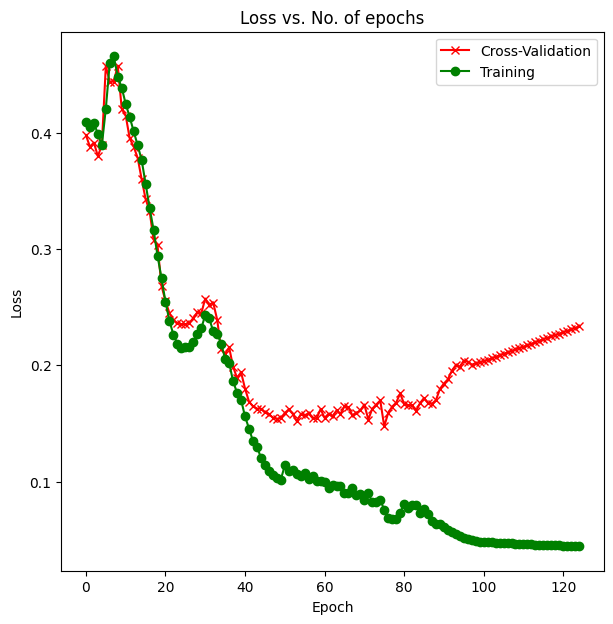

In [25]:
plot_losses(history)

In [ ]:
torch.save(model.state_dict(), 'models/LSTM.pt')

##### Metric names for plots
**Train loss**: 'train_loss'

**Cross validation loss**: 'val_loss'

**accuracy**: 'val_acc'

**F1 score**: 'f1_score'

**Recall**: 'Recall'

**Precision**: 'Precision'

**Learning Rate scheduling(if lr_sched not None)**: 'lrs'


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


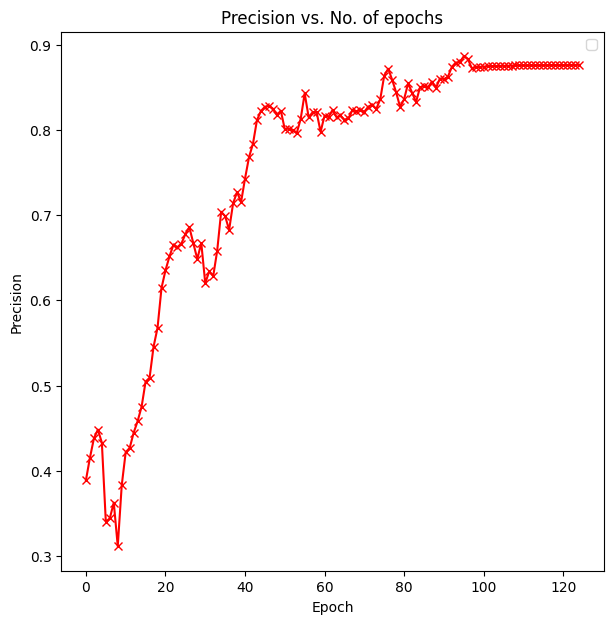

In [27]:
metric = 'Precision'
plot_metrics(history, metric)

# Deep GRU

In [ ]:
hidden_size = 20
input_size = 2
architecture = (256, 128, 64, 32)

In [ ]:
model = DeepGRU(hidden_size, input_size, architecture)

In [ ]:
history = []

In [ ]:
##hyperparameters
epochs = 10
max_lr = 1e-10
weigth_decay = None
grad_clip = None
opt_func = Adam
#opt_func = RMSprop
#opt_func = SGD
#lr_sched = LinearLR
lr_sched = None

In [ ]:
history += model.fit(epochs, max_lr, train_loader, val_loader, weight_decay=0, grad_clip=grad_clip, opt_func=opt_func, lr_sched=lr_sched)

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [0]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [1]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [2]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [3]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [4]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [5]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [6]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [7]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [8]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

Epoch [9]
	train_loss: 0.6931
	val_loss: 0.6931
	val_acc: 0.7811
	f1_score: 0.0000
	recall: 0.0000
	precision: 0.0000


In [ ]:
plot_losses(history)

##### Metric names for plots
**Train loss**: 'train_loss'

**Cross validation loss**: 'val_loss'

**accuracy**: 'val_acc'

**F1 score**: 'f1_score'

**Recall**: 'Recall'

**Precision**: 'Precision'

**Learning Rate scheduling(if lr_sched not None)**: 'lrs'


In [ ]:
metric = 'val_acc'
plot_metrics(history, metric)

# Deep BidirectionalRNN

In [ ]:
hidden_size = 20
input_size = 2
architecture = (256, 128, 64, 32)

In [ ]:
rnn1 = DeepLSTM(hidden_size, input_size, architecture)
rnn2 = DeepGRU(hidden_size, input_size, architecture)
model = BidirectionalRNN(rnn1, rnn2, architecture)

In [ ]:
history = []

In [ ]:
##hyperparameters
epochs = 10
max_lr = 1e-2
weigth_decay = 1e-5
grad_clip = 1e-1
opt_func = Adam
#opt_func = RMSprop
#opt_func = SGD
#lr_sched = LinearLR
lr_sched = OneCycleLR

In [ ]:
history += model.fit(epochs, max_lr, train_loader, val_loader, weight_decay=0, grad_clip=grad_clip, opt_func=opt_func, lr_sched=lr_sched)

In [ ]:
plot_losses(history)

##### Metric names for plots
**Train loss**: 'train_loss'

**Cross validation loss**: 'val_loss'

**accuracy**: 'val_acc'

**F1 score**: 'f1_score'

**Recall**: 'Recall'

**Precision**: 'Precision'

**Learning Rate scheduling(if lr_sched not None)**: 'lrs'


In [ ]:
metric = 'val_acc'
plot_metrics(history, metric)